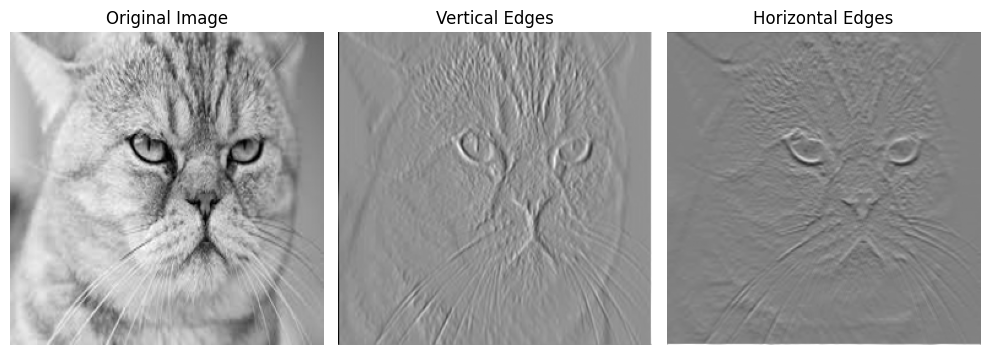

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# Load an image using PIL
image = Image.open("catsample.jpg").convert("L") # Load as grayscale
image = image.resize((256, 256))  # Resize for simplicity
image = np.array(image, dtype=np.float32) / 255.0 # convert to float32 and normalize

# Add batch and channel dimensions (1, 256, 256, 1)
image = np.expand_dims(image, axis=(0, -1))

# Define vertical and horizontal edge detection filters (sobel-like)
vertical_filter = np.array([[1, 0, -1],
                            [1, 0, -1],
                            [1, 0, -1]], dtype=np.float32)

horizontal_filter = np.array([[1, 1, 1],
                              [0, 0, 0],
                              [-1,-1,-1]], dtype=np.float32)


# Reshpae filters for TensorFlow (H, W, in-channels, out-channels)
vertical_filter = vertical_filter.reshape((3, 3, 1, 1))
horizontal_filter = horizontal_filter.reshape((3, 3, 1, 1))

# Apply convolution
vertical_edges = tf.nn.conv2d(image, vertical_filter, strides=[1, 1, 1, 1], padding='SAME')
horizontal_edges = tf.nn.conv2d(image, horizontal_filter, strides=[1, 1, 1, 1], padding='SAME')

# convert tensors to numpy for visualization
vertical_edges = vertical_edges.numpy().squeeze()
horizontal_edges = horizontal_edges.numpy().squeeze()

# plot original and filtered images
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(vertical_edges, cmap='gray')
plt.title('Vertical Edges')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(horizontal_edges, cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')

plt.tight_layout()
plt.show()




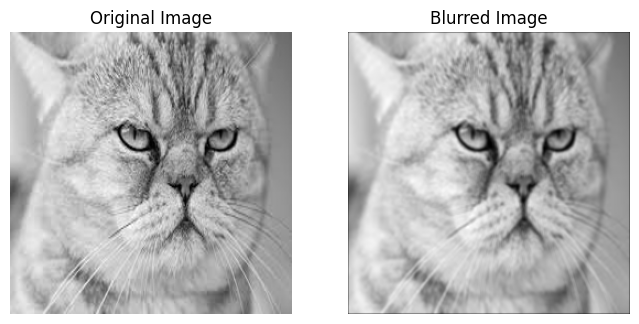

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load an image using PIL
image = Image.open("catsample.jpg").convert("L") # Load as grayscale
image = image.resize((256, 256))  # Resize for simplicity
image = np.array(image, dtype=np.float32) / 255.0 # normalize to range (0,1)

# Add batch and channel dimensions (1, 256, 256, 1)
image = np.expand_dims(image, axis=(0, -1))

# Define a 3xr blurring filter (averaging kernel)
blur_filter = np.array([[ 38/8,  38/8,  38/8],
                        [ 38/8,  38/8,  38/8],
                        [ 38/8,  38/8,  38/8]], dtype=np.float32)

# Reshpae the filter for Tensorflow (H, W, in_channels, out-channels)
blur_filter = blur_filter.reshape((3, 3, 1, 1))

# Apply convolution for blurring
blurred_image = tf.nn.conv2d(image, blur_filter, strides=[1, 1, 1, 1], padding='SAME')

# Convert tensor to numpy for visualization
blurred_image = blurred_image.numpy().squeeze()

# Plot original and blurred images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.show()



